# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></div><div class="lev1 toc-item"><a href="#Generate-Poisson-spikes" data-toc-modified-id="Generate-Poisson-spikes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Generate Poisson spikes</a></div><div class="lev2 toc-item"><a href="#Pyspike-only-generates-fixed-frequency-poisson" data-toc-modified-id="Pyspike-only-generates-fixed-frequency-poisson-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Pyspike only generates fixed-frequency poisson</a></div><div class="lev2 toc-item"><a href="#Spykeutils-can-generate-modulated-(inhomogeneous)-poisson" data-toc-modified-id="Spykeutils-can-generate-modulated-(inhomogeneous)-poisson-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Spykeutils can generate modulated (inhomogeneous) poisson</a></div><div class="lev3 toc-item"><a href="#Like-ramp-cells" data-toc-modified-id="Like-ramp-cells-221"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Like ramp cells</a></div><div class="lev3 toc-item"><a href="#Or-time-cells" data-toc-modified-id="Or-time-cells-222"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Or time cells</a></div><div class="lev1 toc-item"><a href="#Calculate-spike-train-features" data-toc-modified-id="Calculate-spike-train-features-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Calculate spike train features</a></div><div class="lev1 toc-item"><a href="#corr" data-toc-modified-id="corr-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>corr</a></div>

# Imports

In [1]:
import pyspike as spk

import sys
sys.path.append('/home/tevo/anaconda3/lib/python3.6/site-packages/spykeutils')
import spykeutils as spy
import spykeutils.spike_train_generation as stg
import spykeutils.rate_estimation as re
import spykeutils.correlations as spc

import quantities as q

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

# Generate Poisson spikes

## Pyspike only generates fixed-frequency poisson

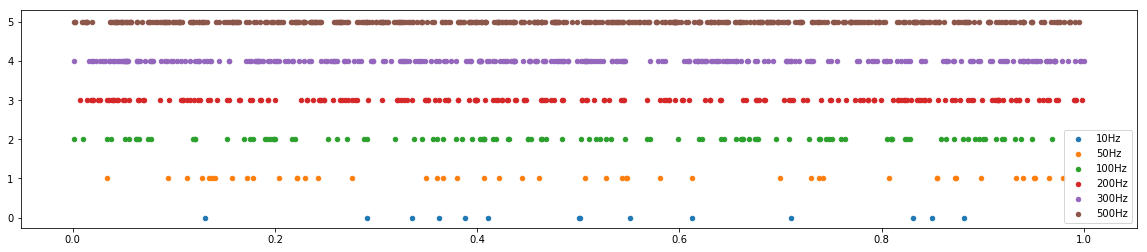

In [324]:
time = 1

plt.figure(figsize=(20,4))
for i,rate in enumerate([10,50,100,200,300,500]):
    spikes = spk.generate_poisson_spikes(rate,1).get_spikes_non_empty()
    plt.scatter(spikes,i*np.ones(len(spikes)),s=20,label='%dHz'%rate)
    plt.legend()

## Spykeutils can generate modulated (inhomogeneous) poisson

### Like ramp cells

In [2]:
time = 1*q.s

plt.figure(figsize=(20,4))
for i,rate in enumerate([10,50,100,200,300,500]):
    modulation = lambda t: .01*q.s + t
    spikes = np.array(stg.gen_inhomogeneous_poisson(modulation,t_stop=time,max_rate=rate*q.Hz))
    plt.scatter(spikes,i*np.ones(len(spikes)),s=20,label='%dHz'%rate)
    plt.legend()

NameError: name 'np' is not defined

### Or time cells

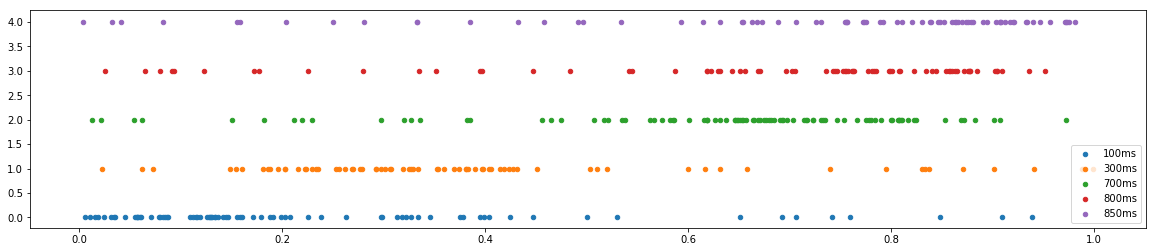

In [376]:
import scipy.stats as st
time = 1*q.s

plt.figure(figsize=(20,4))
for i,timefire in enumerate([.1,.3,.7,.8,.85]):
    modulation = lambda t: .06 + st.norm(timefire,.1).pdf(t)/10
    spikes = np.array(stg.gen_inhomogeneous_poisson(modulation,t_stop=time,max_rate=rate*q.Hz))
    plt.scatter(spikes,i*np.ones(len(spikes)),s=20,label='%dms'%(1000*timefire))
    plt.legend(loc='lower right')

# Calculate spike train features

In [3]:
time=10*q.s
trains = {'lowfire':[stg.gen_homogeneous_poisson(rate*q.Hz,t_stop=time) for rate in [10,10,10,10,10]],
          'highfire':[stg.gen_homogeneous_poisson(rate*q.Hz,t_stop=time) for rate in [30,30,30,30,30]],
          'lowramp':[stg.gen_inhomogeneous_poisson(modulation,t_stop=time,max_rate=rate*q.Hz) for rate in [10,10,10,10,10]],
          'highramp':[stg.gen_inhomogeneous_poisson(modulation,t_stop=time,max_rate=rate*q.Hz) for rate in [30,30,30,30,30]]}

In [4]:
corr = spc.correlogram(trains,50*q.ms,border_correction=False)

In [5]:
re.spike_density_estimation(trains)

TypeError: astype() got an unexpected keyword argument 'copy'

In [9]:
np.array(trains['lowfire'][0])

array([ 0.10464651,  0.17547783,  0.18117382,  0.47363989,  0.96503891,
        1.17612746,  1.18223968,  1.34952151,  1.48652708,  1.80357864,
        1.93014513,  2.10412796,  2.42924789,  2.59006895,  2.64130747,
        2.68828106,  2.84372166,  2.85154463,  3.28444275,  3.31505423,
        3.47162421,  4.00884267,  4.02845223,  4.10113048,  4.2502869 ,
        4.3533688 ,  4.67586239,  4.82262254,  4.89832898,  4.95873323,
        4.96292866,  5.03195652,  5.07217258,  5.10018647,  5.15224039,
        5.17390474,  5.26761975,  5.27881215,  5.30184572,  5.34385632,
        5.51034876,  5.65479607,  5.65489281,  5.70264318,  5.82523693,
        5.89811444,  5.95434855,  6.08397511,  6.09323408,  6.37096628,
        6.40577307,  6.45457634,  6.4971529 ,  6.64615061,  6.80809581,
        6.82626297,  6.94974711,  7.17006735,  7.29663689,  7.43141588,
        7.54751303,  7.57831513,  7.69437148,  7.82619395,  8.08731258,
        8.09896443,  8.10129109,  8.11425751,  8.21086243,  8.32

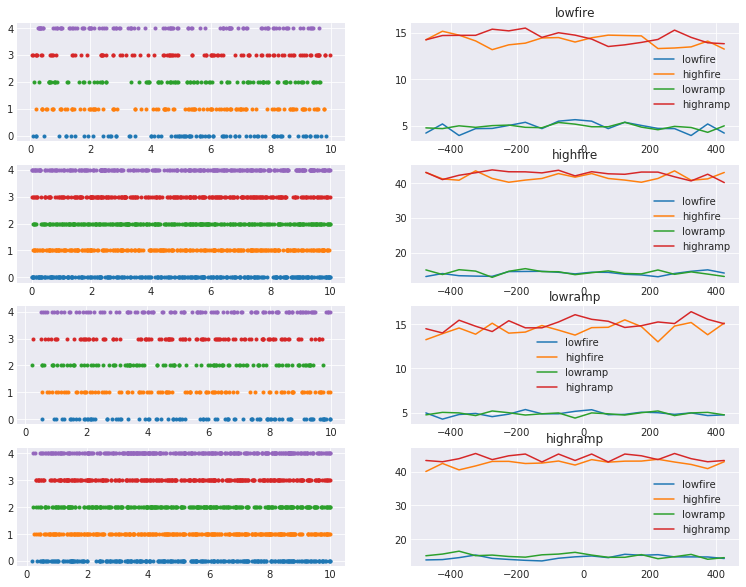

In [20]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,10))

for i,key in enumerate(corr[0]):
    plt.subplot(4,3,3*(i+1)-1)
    for j,train in enumerate(trains[key]):
        plt.plot(np.array(train),np.ones(len(np.array(train)))*j,'.')
    plt.subplot(4,3,3*(i+1))
    for keyin in corr[0]:
        plt.plot(corr[1][:-1],corr[0][key][keyin],label = keyin)
        plt.legend()
        plt.title(key)
    

In [395]:
isi_profile = spk.isi_profile(trains)

KeyError: 0

In [ ]:
isi_profile